In [268]:
import re
import pandas as pd

In [269]:
f = open('group.txt','r',encoding= 'utf-8')
# f = open('nongroup.txt','r',encoding= 'utf-8')

In [270]:
data = f.read()

In [271]:
pattern = r'\[(\d{2}/\d{2}/\d{2}, \d{2}:\d{2}:\d{2}\s*[AP]M)\] (.*?)$'

In [272]:
messages = []

for match in re.findall(pattern, data, re.MULTILINE):
    messages.append(match[1].strip())

In [273]:
dates = []

for match in re.findall(pattern, data, re.MULTILINE):
    dates.append(match[0].strip())

In [274]:
df = pd.DataFrame({'message_date':dates,'user_message':messages})
df['message_date'] = pd.to_datetime(df['message_date'], format='%y/%m/%d, %I:%M:%S %p')

df.rename(columns={'message_date': 'date'}, inplace=True)

df.head()

,date,user_message
0,2005-03-23 10:54:23,Abhishek Honnapure: ‎image omitted
1,2005-03-23 10:57:08,Soham Sarkar PES EC: For EC campus!!!
2,2007-03-23 22:57:21,~ Prajwal Rai: ‎~ Prajwal Rai joined using thi...
3,2009-03-23 23:07:34,~ Sowmesh Sharma: https://pesu.io/courses
4,2009-03-23 23:07:34,~ Sowmesh Sharma: ‎image omitted


In [275]:
df.shape

(254, 2)

In [276]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]: # user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,user,message
0,2005-03-23 10:54:23,Abhishek Honnapure,‎image omitted
1,2005-03-23 10:57:08,Soham Sarkar PES EC,For EC campus!!!
2,2007-03-23 22:57:21,~ Prajwal Rai,‎~ Prajwal Rai joined using this group's invit...
3,2009-03-23 23:07:34,~ Sowmesh Sharma,https://pesu.io/courses
4,2009-03-23 23:07:34,~ Sowmesh Sharma,‎image omitted


In [277]:
df['year'] = df['date'].dt.year

In [278]:
df['month'] = df['date'].dt.month_name()

In [279]:
df['day'] = df['date'].dt.day

In [280]:
df['hour'] = df['date'].dt.hour

In [281]:
df['minute'] = df['date'].dt.minute

In [282]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2005-03-23 10:54:23,Abhishek Honnapure,‎image omitted,2005,March,23,10,54
1,2005-03-23 10:57:08,Soham Sarkar PES EC,For EC campus!!!,2005,March,23,10,57
2,2007-03-23 22:57:21,~ Prajwal Rai,‎~ Prajwal Rai joined using this group's invit...,2007,March,23,22,57
3,2009-03-23 23:07:34,~ Sowmesh Sharma,https://pesu.io/courses,2009,March,23,23,7
4,2009-03-23 23:07:34,~ Sowmesh Sharma,‎image omitted,2009,March,23,23,7


In [283]:
df[df['user'] == '~ Sowmesh Sharma'].shape

(3, 8)

In [284]:
words = []
for message in df['message']:
    words.extend(message.split())

In [285]:
len(words)

1461

In [286]:
# df[df['message'] == '\u200Eimage omitted']

In [287]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Let's www.gamil.com have URL stackoverflow.com as an example google.com, http://facebook.com, ftp://url.in")
urls

['www.gamil.com',
 'stackoverflow.com',
 'google.com',
 'http://facebook.com',
 'ftp://url.in']

In [288]:
links = []

for message in df['message']:
    links.extend(extractor.find_urls(message))

In [289]:
len(links)

14

In [290]:
x = df['user'].value_counts().head()

In [291]:
import matplotlib.pyplot as plt

In [292]:
name = x.index
count = x.values

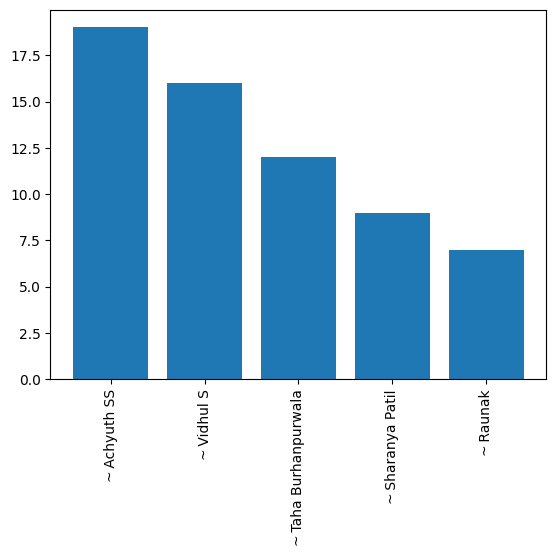

In [293]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [294]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name', 'user':'percent'})

,name,percent
0,~ Achyuth SS,7.48
1,~ Vidhul S,6.30
2,~ Taha Burhanpurwala,4.72
3,~ Sharanya Patil,3.54
4,~ Raunak,2.76
...,...,...
116,‪+91 94348 63334‬,0.39
117,‪+91 70222 81472‬,0.39
118,‪+91 70071 54128‬,0.39
119,‪+91 77955 37491‬,0.39


In [295]:
words = []

for message in df['message']:
    words.extend(message.split())

In [296]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,omitted,70
1,‎image,64
2,this,43
3,joined,40
4,using,40
5,group's,40
6,invite,40
7,link,40
8,the,30
9,‎‪+91,27


In [297]:
# reomve grp notification
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '\u200Eimage omitted']

In [298]:
f = open('hinglish.txt','r')
stop_words = f.read()

In [299]:
words = []

for message in temp['message']:
        for word in message.lower().split():
            if word not in stop_words:
                words.append(word)

In [300]:
from collections import Counter
most_common_df = pd.DataFrame(Counter(words).most_common(20))

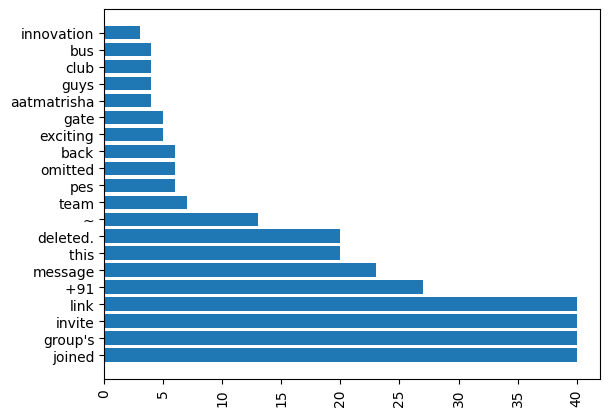

In [301]:
plt.barh(most_common_df[0], most_common_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [302]:
import emoji

emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [303]:
emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

C:\Users\abhih\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abhih\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129345 (\N{DRUM WITH DRUMSTICKS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abhih\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abhih\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


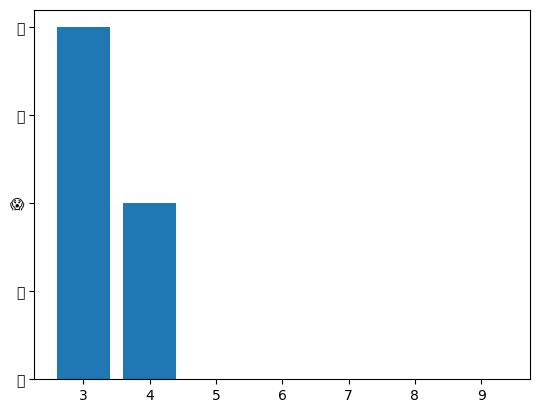

In [304]:
plt.bar(emoji_df[1].head(), emoji_df[0].head())
plt.show()

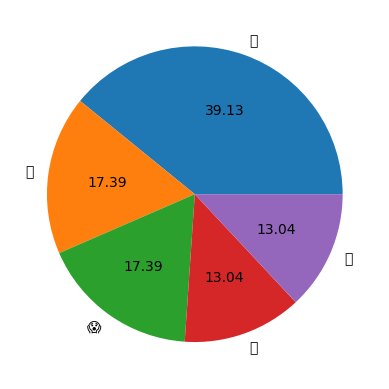

In [305]:
plt.pie(emoji_df[1].head(),labels=emoji_df[0].head(),autopct="%0.2f")
plt.show()

In [306]:
df['month_num'] = df["date"].dt.month

In [307]:
timeline = df.groupby(['year', 'month_num', 'month'])['message'].count().reset_index()

In [308]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "." + str(timeline['year'][i]))

In [309]:
timeline['time'] = time

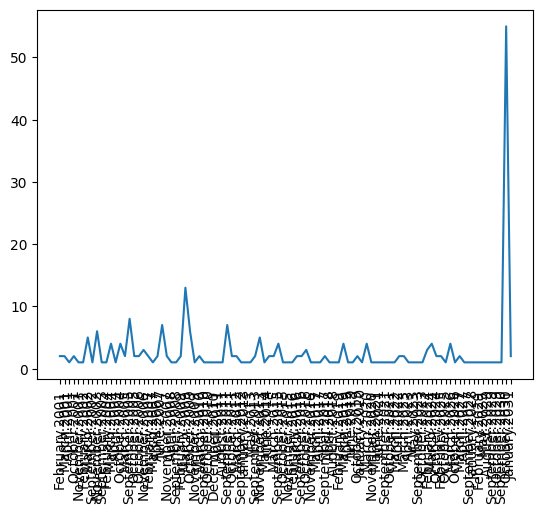

In [310]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [318]:
df['only_date'] = df['date'].dt.date

In [319]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

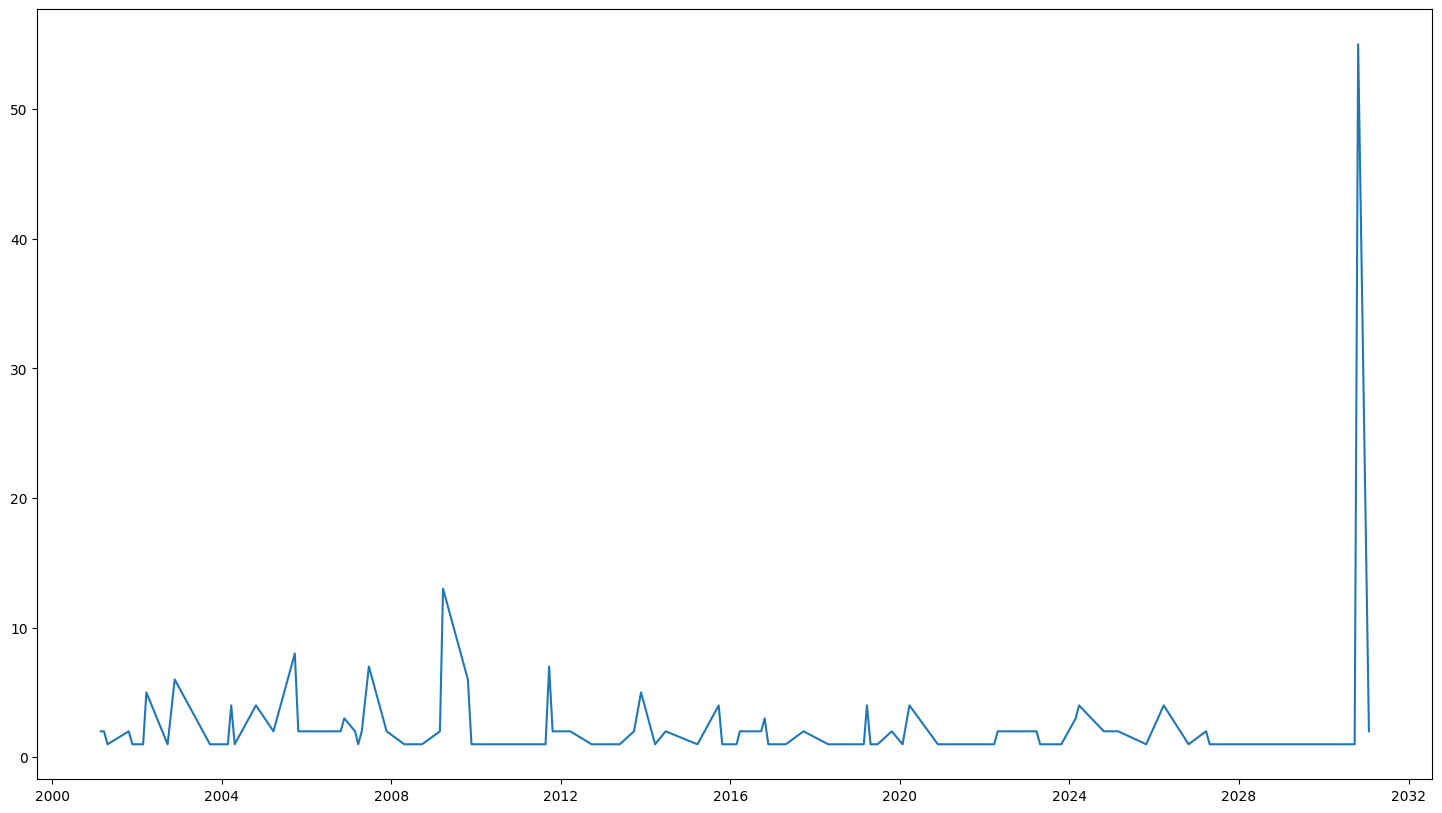

In [320]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])

In [321]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2005-03-23 10:54:23,Abhishek Honnapure,‎image omitted,2005,March,23,10,54,3,2005-03-23
1,2005-03-23 10:57:08,Soham Sarkar PES EC,For EC campus!!!,2005,March,23,10,57,3,2005-03-23
2,2007-03-23 22:57:21,~ Prajwal Rai,‎~ Prajwal Rai joined using this group's invit...,2007,March,23,22,57,3,2007-03-23
3,2009-03-23 23:07:34,~ Sowmesh Sharma,https://pesu.io/courses,2009,March,23,23,7,3,2009-03-23
4,2009-03-23 23:07:34,~ Sowmesh Sharma,‎image omitted,2009,March,23,23,7,3,2009-03-23


In [326]:
df['day_name'] = df['date'].dt.day_name()

In [327]:
df['day_name'].value_counts()

Wednesday    78
Saturday     48
Monday       42
Friday       36
Sunday       19
Tuesday      16
Thursday     15
Name: day_name, dtype: int64

In [328]:
df['month'].value_counts()

October      87
March        59
September    35
November     21
February     16
April        13
June         11
January       5
May           3
August        3
December      1
Name: month, dtype: int64

In [329]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2005-03-23 10:54:23,Abhishek Honnapure,‎image omitted,2005,March,23,10,54,3,2005-03-23,Wednesday
1,2005-03-23 10:57:08,Soham Sarkar PES EC,For EC campus!!!,2005,March,23,10,57,3,2005-03-23,Wednesday
2,2007-03-23 22:57:21,~ Prajwal Rai,‎~ Prajwal Rai joined using this group's invit...,2007,March,23,22,57,3,2007-03-23,Friday
3,2009-03-23 23:07:34,~ Sowmesh Sharma,https://pesu.io/courses,2009,March,23,23,7,3,2009-03-23,Monday
4,2009-03-23 23:07:34,~ Sowmesh Sharma,‎image omitted,2009,March,23,23,7,3,2009-03-23,Monday


In [330]:
period = []

for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str("00"))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [331]:
df['period'] = period

In [333]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
138,2024-10-23 11:02:27,~ Vijit Kumar,‎image omitted,2024,October,23,11,2,10,2024-10-23,Wednesday,11-12
175,2030-10-23 12:33:11,~ Tanusha Raina,Is it a bus ?,2030,October,23,12,33,10,2030-10-23,Wednesday,12-13
31,2021-03-23 12:57:48,‪+91 91 135 762 19‬,‎image omitted,2021,March,23,12,57,3,2021-03-23,Tuesday,12-13
199,2002-11-23 11:54:01,~ Hemu,‎POLL:,2002,November,23,11,54,11,2002-11-23,Saturday,11-12
149,2030-10-23 12:18:16,~ Pramathi,Are you serious?!,2030,October,23,12,18,10,2030-10-23,Wednesday,12-13


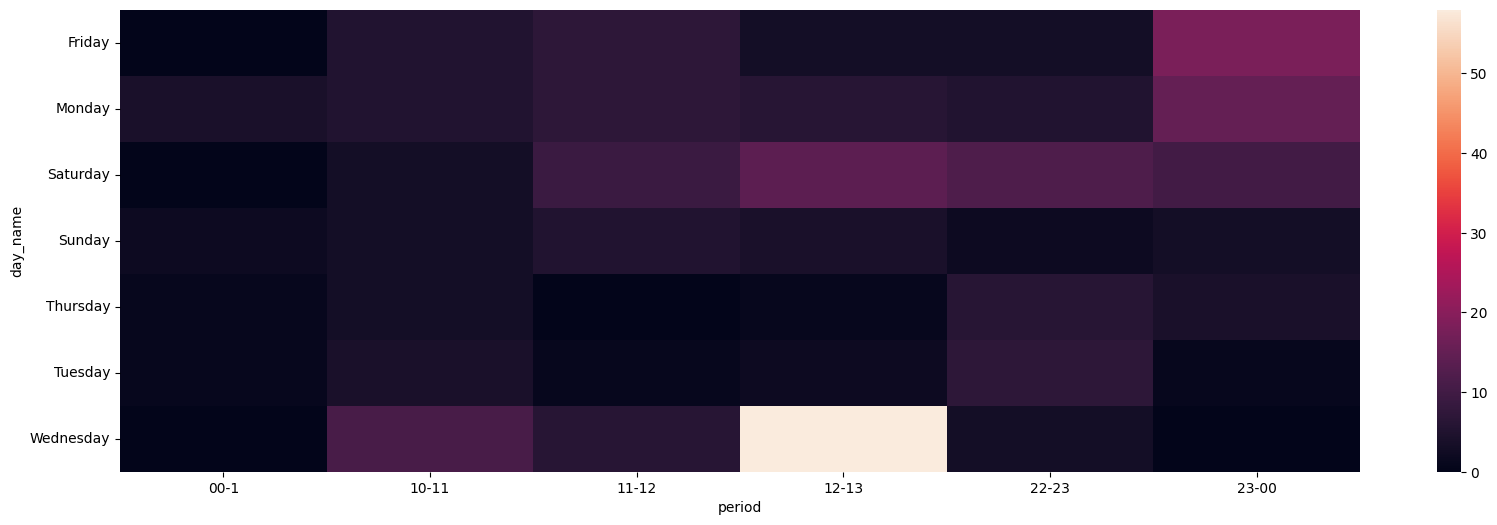

In [335]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()